In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
import audio_functions as af
import plot
from scipy import signal
import IPython

In [68]:
def signals_ploter(*signals, row=1, col=1, size = (8, 4), save = False, file_name = "mi_grafico", image_dpi = 200):
    """
    Plots signals in a grid of subplots.

    Parameters
    ----------
    *signals : tuple
        Variable number of signal dictionaries, each containing information for one subplot.
    row : int, optional
        Number of rows in the subplot grid. Default is 1.
    col : int, optional
        Number of columns in the subplot grid. Default is 1.
    size : tuple, optional
        Figure size in inches, formatted as (width, height). Default is (8, 4).
    save : bool, optional
        If True, saves the plot as an image file. Default is False.
    file_name : str, optional
        Name of the image file if save is True. Default is "mi_grafico".
    image_dpi : int, optional
        Dots per inch for the saved image. Default is 200.
    
    Signal Dictionary Parameters
    ----------------------------
    x : array
        x-axis values.
    y : array
        y-axis values.
    color : str, optional
        Line color.
    linestyle : str, optional
        Line style.
    legend : str, optional
        Label for the legend.
    pos : int, optional
        Position index for single-row or single-column subplots.
    row : int, optional
        Row index for multi-row subplots.
    col : int, optional
        Column index for multi-column subplots.
    xscale : str, optional
        Scaling for the x-axis.
    yscale : str, optional
        Scaling for the y-axis.
    xticks : array, optional
        Custom x-axis tick positions.
    yticks : array, optional
        Custom y-axis tick positions.
    xlimits : tuple, optional
        Custom x-axis limits.
    ylimits : tuple, optional
        Custom y-axis limits.
    title : str, optional
        Subplot title.
    labels : tuple, optional
        x and y-axis labels.
    grid : bool, optional
        If True, displays grid lines.
    
    Returns
    -------
    None
    """
    if row <= 0 or col <= 0:
        raise ValueError("Number of rows and columns must be positive integers.")
    if type(row) != int or type(col) != int:
        raise ValueError("Number of rows and columns must be positive integers.")
        
    x_fig_size, y_fig_size = size
    
    fig, axs = plt.subplots(row, col)
    
    fig.set_size_inches(x_fig_size, y_fig_size)
    
    if row == 1 or col == 1:
        for signal in signals:
            if "color" in signal and "legend" in signal:
                axs[signal["pos"]].plot(signal["x"], signal["y"], label=signal["legend"], color=signal["color"])
                axs[signal["pos"]].legend()
            elif "color" in signal:
                axs[signal["pos"]].plot(signal["x"], signal["y"], color=signal["color"])
            elif "linestyle" in signal and "legend" in signal:
                axs[signal["pos"]].plot(signal["x"], signal["y"], label=signal["legend"], ls=signal["linestyle"], color="k", alpha=0.7)
                axs[signal["pos"]].legend()
            elif "linestyle" in signal:
                axs[signal["pos"]].plot(signal["x"], signal["y"], ls=signal["linestyle"], color="k", alpha=0.7)
            elif "legend" in signal:
                axs[signal["pos"]].plot(signal["x"], signal["y"], label=signal["legend"])
                axs[signal["pos"]].legend()

            else:
                axs[signal["pos"]].plot(signal["x"], signal["y"])
            
            if "xscale" in signal:
                axs[signal["pos"]].set_xscale(signal["xscale"])
            else:
                axs[signal["pos"]].set_xscale("linear")
            
            if "yscale" in signal:
                axs[signal["pos"]].set_yscale(signal["yscale"])
            else:
                axs[signal["pos"]].set_yscale("linear")

            if "xticks" in signal:
                axs[signal["pos"]].set_xticks(signal["xticks"], signal["xticks"])
                axs[signal["pos"]].tick_params(axis="x", labelrotation=45)
            else:
                pass
            
            if "yticks" in signal:
                axs[signal["pos"]].set_yticks(signal["yticks"], signal["yticks"])
            else:
                pass
            
            if "xlimits" in signal:
                axs[signal["pos"]].set_xlim(signal["xlimits"][0], signal["xlimits"][1])
            else:
                axs[signal["pos"]].set_xlim(auto = True)

            if "ylimits" in signal:
                axs[signal["pos"]].set_ylim(signal["ylimits"][0], signal["ylimits"][1])
            else:
                axs[signal["pos"]].set_ylim(auto = True)
            
            
            if "title" in signal:
                axs[signal["pos"]].set_title(signal["title"], fontsize=16)
            else:
                pass
            if "labels" in signal:
                axs[signal["pos"]].set_xlabel(signal["labels"][0], fontsize=12)
                axs[signal["pos"]].set_ylabel(signal["labels"][1], fontsize=12)
                
            else:
                axs[signal["pos"]].set_xlabel("Tiempo [s]", fontsize=12)
                axs[signal["pos"]].set_ylabel("Amplitud", fontsize=12)
            if "grid" in signal:
                axs[signal["pos"]].grid(signal["grid"], alpha=0.6)
            else:
                axs[signal["pos"]].grid(alpha=0.6)
            
                
    else:
        for signal in signals:   
            if "color" in signal and "legend" in signal:
                axs[signal["row"]][signal["col"]].plot(signal["x"], signal["y"], label=signal["legend"], color=signal["color"])
                axs[signal["row"]][signal["col"]].legend()
            elif "color" in signal:
                axs[signal["row"]][signal["col"]].plot(signal["x"], signal["y"], color=signal["color"])
            elif "linestyle" in signal and "legend" in signal:
                axs[signal["row"]][signal["col"]].plot(signal["x"], signal["y"], ls=signal["linestyle"], label=signal["legend"], color="k", alpha=0.7)
                axs[signal["row"]][signal["col"]].legend()
            elif "linestyle" in signal:
                axs[signal["row"]][signal["col"]].plot(signal["x"], signal["y"], ls=signal["linestyle"], color="k", alpha=0.7)
            elif "legend" in signal:
                axs[signal["row"]][signal["col"]].plot(signal["x"], signal["y"], label=signal["legend"])
                axs[signal["row"]][signal["col"]].legend()
            
            
            else:
                axs[signal["row"]][signal["col"]].plot(signal["x"], signal["y"])
            
            if "xscale" in signal:
                axs[signal["row"]][signal["col"]].set_xscale(signal["xscale"])
            else:
                axs[signal["row"]][signal["col"]].set_xscale("linear")
            if "yscale" in signal:
                axs[signal["row"]][signal["col"]].set_yscale(signal["yscale"])
            else:
                axs[signal["row"]][signal["col"]].set_yscale("linear")
    
            if "xlimits" in signal:
                axs[signal["row"]][signal["col"]].set_xlim(signal["xlimits"][0], signal["xlimits"][1])
            else:
                axs[signal["row"]][signal["col"]].set_xlim(auto = True)
    
            if "ylimits" in signal:
                axs[signal["row"]][signal["col"]].set_ylim(signal["ylimits"][0], signal["ylimits"][1])
            else:
                axs[signal["row"]][signal["col"]].set_ylim(auto = True)
    
            if "xticks" in signal:
                axs[signal["row"]][signal["col"]].set_xticks(signal["xticks"], signal["xticks"])
                axs[signal["row"]][signal["col"]].tick_params(axis="x", labelrotation=45)
            else:
                pass
            if "yticks" in signal:
                axs[signal["row"]][signal["col"]].set_yticks(signal["yticks"], signal["yticks"])
            else:
                pass
            
    
            if "title" in signal:
                axs[signal["row"]][signal["col"]].set_title(signal["title"], fontsize=16)
            else:
                pass
            if "labels" in signal:
                axs[signal["row"]][signal["col"]].set_xlabel(signal["labels"][0], fontsize=12)
                axs[signal["row"]][signal["col"]].set_ylabel(signal["labels"][1], fontsize=12)
            else:
                axs[signal["row"]][signal["col"]].set_xlabel("Tiempo [s]", fontsize=12)
                axs[signal["row"]][signal["col"]].set_ylabel("Amplitud", fontsize=12)
            if "grid" in signal:
                axs[signal["row"]][signal["col"]].grid(signal["grid"], alpha=0.6)
            else:
                axs[signal["row"]][signal["col"]].grid(alpha=0.6)
            

    fig.tight_layout()
    if save == True:
        plt.savefig(f'{file_name}.png', dpi = image_dpi)
        
    plt.show()
    
    return

def get_audio_time_array(audio, fs):
    """
    Returns audio time array
    Input:
        - audio: array type object.
        - fs: Int type object. Sample rate.
    Output:
        - duration: int type object. Audio duration
        - time_array: array type object.
        
    Raices:
        - TypeError: if audio is not an array 
        - TypeError: if fs is not an int
    """

    duration = audio.size // fs
    time_array = np.linspace(0, duration, audio.size)

    return duration, time_array

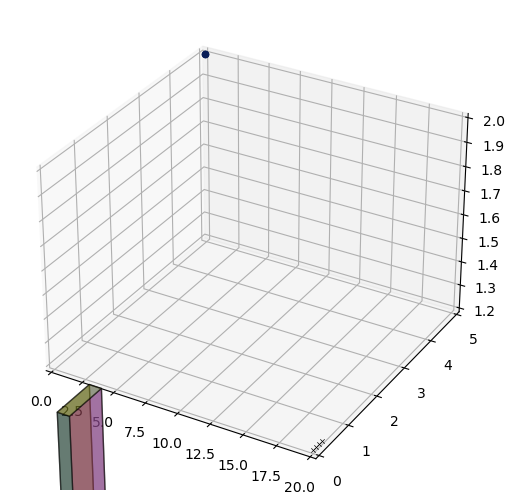

In [ ]:
fs = 48000

#Creo la habitación anecóica
room = pra.AnechoicRoom(dim=3, fs=fs, sigma2_awgn=0.0000001, air_absorption=True, temperature=20, humidity=40)

#Cargo el audio para poder asignarlo a la fuente
audio, _ =af.load_audio("audios_anecoicos/p336_001.wav")

#Agrego fuente a la sala
room.add_source([0, 5, 2], signal=audio)

#Agrego array de mics a la sala
mic_array_loc = np.c_[[20, 0, 1.2], [20, 0.1, 1.2], [20, 0.2, 1.2], [20, 0.3, 1.2]]
room.add_microphone_array(mic_array_loc)

room.plot()

af.play_audio(audio,fs)

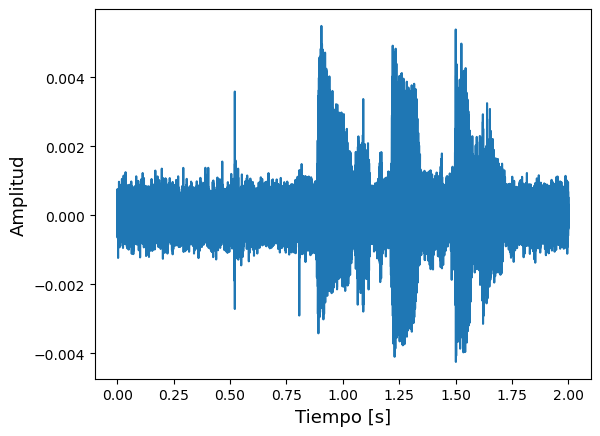

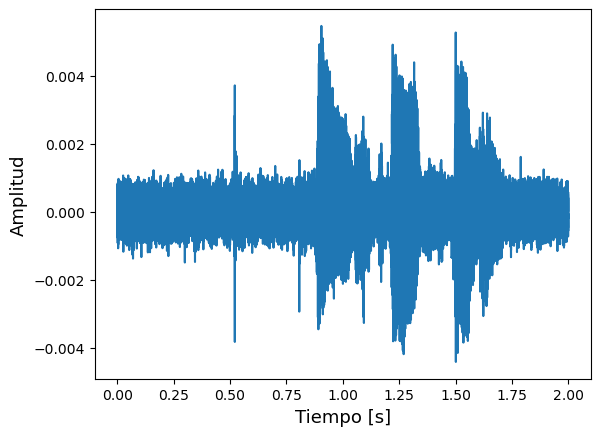

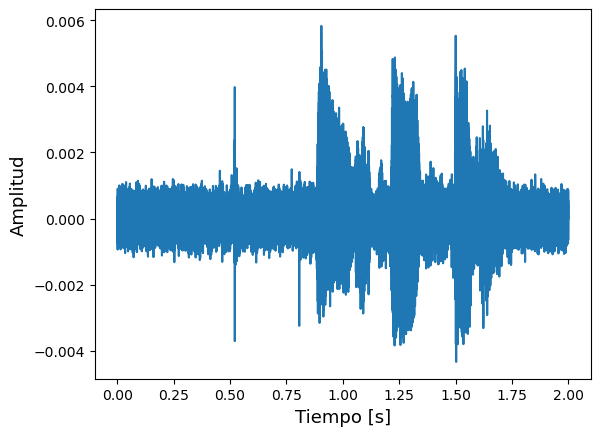

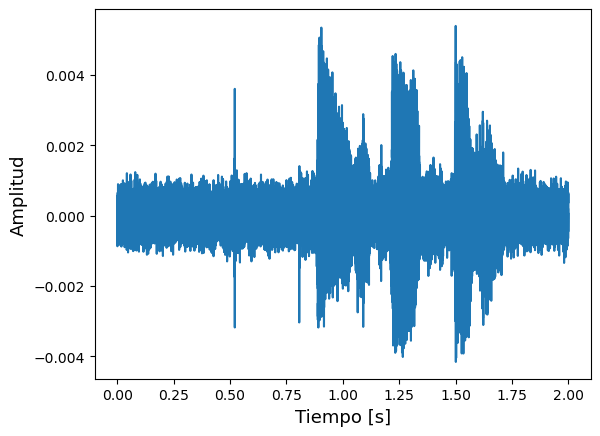

In [76]:
#Realizo la simulación
room.simulate()

#Obtengo cada audio grabado en la sala
grabaciones = room.mic_array.signals

for i in np.arange(len(grabaciones)):
    mic_i = grabaciones[i]
    dur, t = get_audio_time_array(mic_i, fs)
    mic_plot = {"time vector":t, "signal":mic_i, "label":f"Señal del Micrófono {i}"}
    plot.plot_signal(mic_plot)
    IPython.display.display(IPython.display.Audio(mic_i, rate = fs))

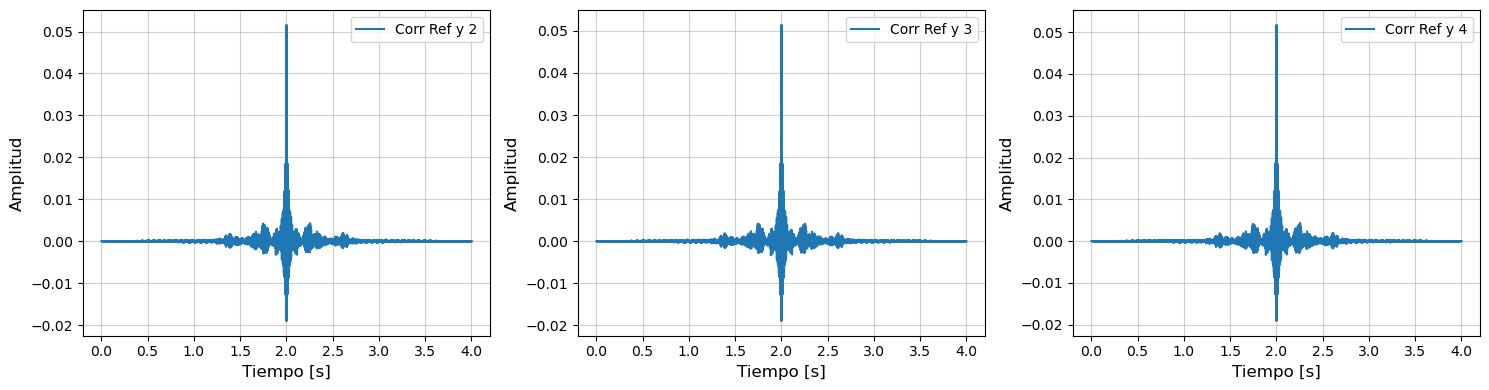

In [77]:
corr = []
for i in np.arange(len(grabaciones)-1):
    corr_class = signal.correlate(grabaciones[0], grabaciones[i+1])
    corr.append(corr_class)

_, t_corr = get_audio_time_array(corr[0], fs)

corr_plot_1 = {"x":t_corr, "y":corr[0], "pos":0, "legend":f"Corr Ref y 2"}
corr_plot_2 = {"x":t_corr, "y":corr[1], "pos":1, "legend":f"Corr Ref y 3"}
corr_plot_3 = {"x":t_corr, "y":corr[2], "pos":2, "legend":f"Corr Ref y 4"}

signals_ploter(corr_plot_1, corr_plot_2, corr_plot_3, col=3, size=(15, 4))

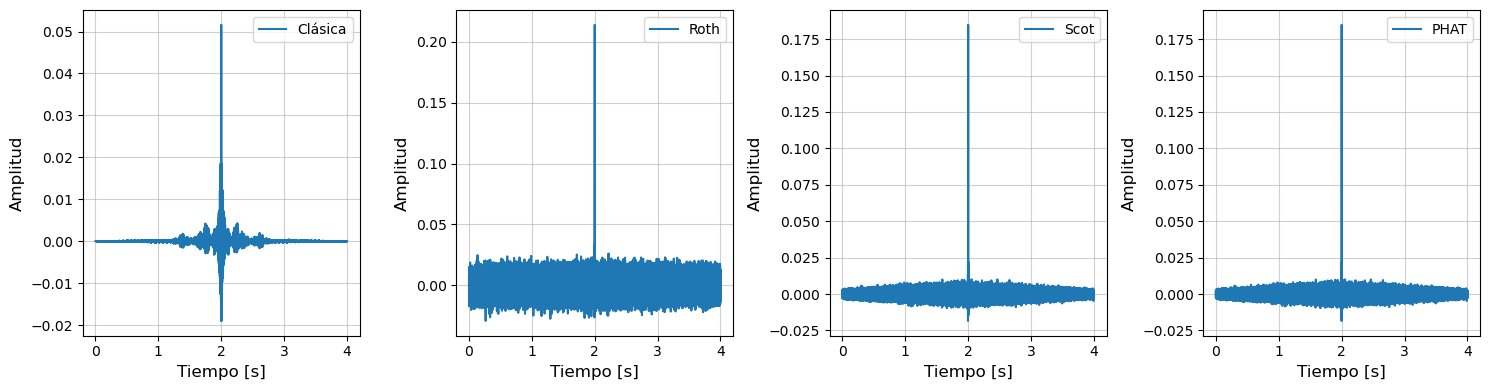

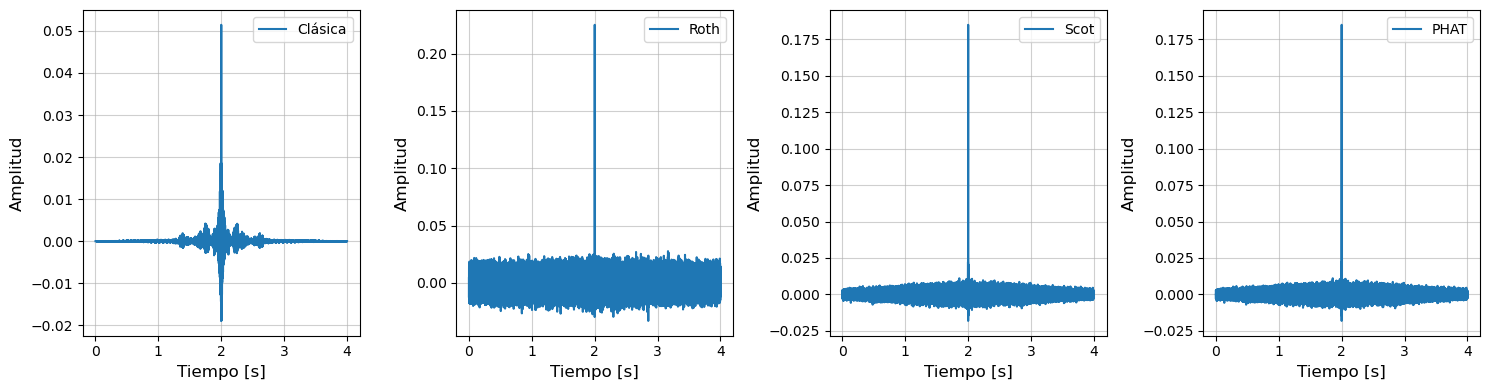

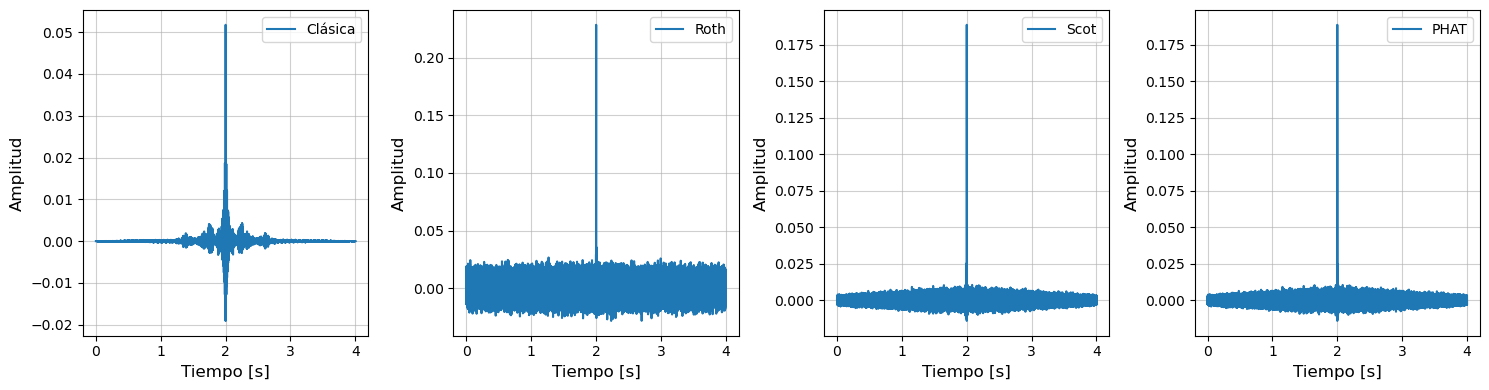

In [78]:
for i in np.arange(len(grabaciones)-1):
    corr_class = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs)
    corr_roth = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs, mode="Roth")
    corr_scot = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs, mode="Scot")
    corr_phat = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs, mode="PHAT")
    _, t_corr = get_audio_time_array(corr_class, fs)
    corr_plot_class = {"x":t_corr, "y":corr_class, "pos":0, "legend":f"Clásica"}
    corr_plot_roth = {"x":t_corr, "y":corr_roth, "pos":1, "legend":f"Roth"}
    corr_plot_scot = {"x":t_corr, "y":corr_scot, "pos":2, "legend":f"Scot"}
    corr_plot_phat = {"x":t_corr, "y":corr_phat, "pos":3, "legend":f"PHAT"}
    signals_ploter(corr_plot_class, corr_plot_roth, corr_plot_scot, corr_plot_phat, col=4, size=(15, 4))